# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("df_dummies.csv")
df.head()

posse_de_veiculo  posse_de_imovel  qtd_filhos      idade  tempo_emprego  \
0                 1                1           0  58.832877       3.106849   
1                 0                1           0  52.356164       8.358904   
2                 0                1           0  52.356164       8.358904   
3                 1                1           0  46.224658       2.106849   
4                 1                0           0  29.230137       3.021918   

   possui_celular  possui_fone_comercial  possui_fone  possui_email  \
0               1                      0            0             0   
1               1                      0            1             1   
2               1                      0            1             1   
3               1                      1            1             1   
4               1                      0            0             0   

   qt_pessoas_residencia  ...  estado_civil_Married  estado_civil_Separated  \
0                    2.0  ...                     1                       0   
1                    1.0  ...                     0                       0   
2                    1.0  ...                     0                       0   
3                    2.0  ...                     1                       0   
4                    2.0  ...                     1                       0   

   estado_civil_Single / not married  estado_civil_Widow  \
0                                  0                   0   
1                                  1                   0   
2                                  1                   0   
3                                  0                   0   
4                                  0                   0   

   tipo_residencia_Co-op apartment  tipo_residencia_House / apartment  \
0                                0                                  1   
1                                0                                  1   
2                                0                                  1   
3                                0                                  1   
4                                0                                  1   

   tipo_residencia_Municipal apartment  tipo_residencia_Office apartment  \
0                                    0                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   tipo_residencia_Rented apartment  tipo_residencia_With parents  
0                                 0                             0  
1                                 0                             0  
2                                 0                             0  
3                                 0                             0  
4                                 0                             0  

[5 rows x 34 columns]

In [3]:
y = df['mau']
y

0        0
1        0
2        0
3        0
4        0
        ..
16645    1
16646    1
16647    1
16648    1
16649    1
Name: mau, Length: 16650, dtype: int64

In [4]:
X = df.drop(columns="mau")
X

posse_de_veiculo  posse_de_imovel  qtd_filhos      idade  \
0                     1                1           0  58.832877   
1                     0                1           0  52.356164   
2                     0                1           0  52.356164   
3                     1                1           0  46.224658   
4                     1                0           0  29.230137   
...                 ...              ...         ...        ...   
16645                 0                1           0  54.109589   
16646                 0                1           0  43.389041   
16647                 1                1           0  30.005479   
16648                 1                1           0  30.005479   
16649                 0                1           0  33.936986   

       tempo_emprego  possui_celular  possui_fone_comercial  possui_fone  \
0           3.106849               1                      0            0   
1           8.358904               1                      0            1   
2           8.358904               1                      0            1   
3           2.106849               1                      1            1   
4           3.021918               1                      0            0   
...              ...             ...                    ...          ...   
16645       9.884932               1                      0            0   
16646       7.380822               1                      1            1   
16647       9.800000               1                      1            0   
16648       9.800000               1                      1            0   
16649       3.630137               1                      0            1   

       possui_email  qt_pessoas_residencia  ...  estado_civil_Married  \
0                 0                    2.0  ...                     1   
1                 1                    1.0  ...                     0   
2                 1                    1.0  ...                     0   
3                 1                    2.0  ...                     1   
4                 0                    2.0  ...                     1   
...             ...                    ...  ...                   ...   
16645             0                    2.0  ...                     0   
16646             0                    2.0  ...                     1   
16647             0                    2.0  ...                     1   
16648             0                    2.0  ...                     1   
16649             1                    2.0  ...                     1   

       estado_civil_Separated  estado_civil_Single / not married  \
0                           0                                  0   
1                           0                                  1   
2                           0                                  1   
3                           0                                  0   
4                           0                                  0   
...                       ...                                ...   
16645                       0                                  0   
16646                       0                                  0   
16647                       0                                  0   
16648                       0                                  0   
16649                       0                                  0   

       estado_civil_Widow  tipo_residencia_Co-op apartment  \
0                       0                                0   
1                       0                                0   
2                       0                                0   
3                       0                                0   
4                       0                                0   
...                   ...                              ...   
16645                   0                                0   
16646                   0                                0   
16647                   0            

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [6]:
clf = DecisionTreeClassifier()

In [7]:
clf = clf.fit(X_train, y_train)

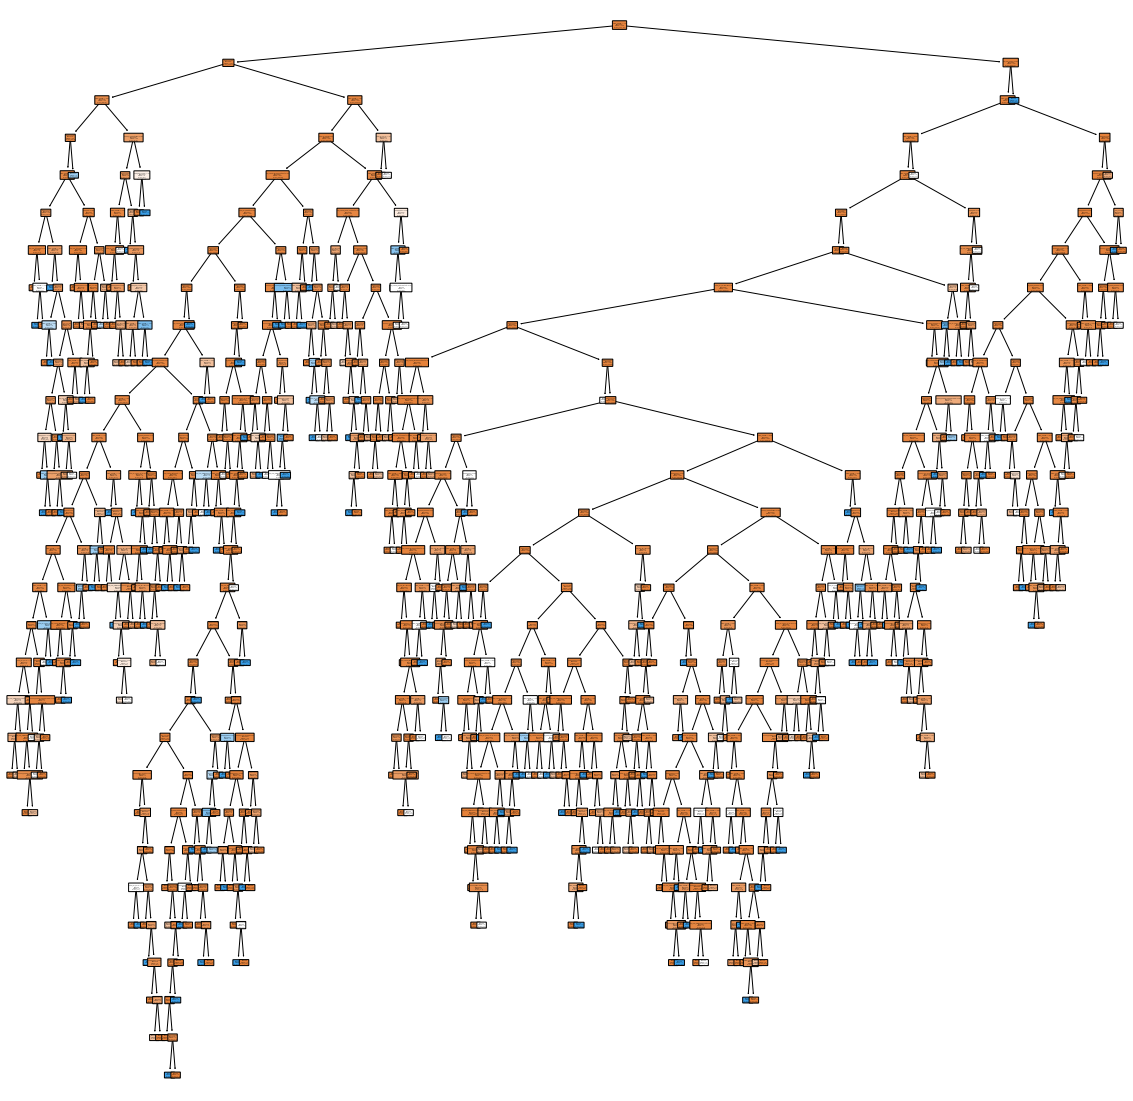

In [11]:
plt.figure(figsize=[20,20])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=X_train.columns);

/home/fabzd/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


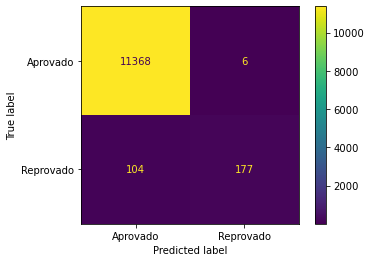

In [13]:
plot_confusion_matrix(clf, X_train, y_train, display_labels=['Aprovado', 'Reprovado']);

In [14]:
y_predito = clf.predict(X_train)
accuracy_score(y_train, y_predito)

0.9905619905619906

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

/home/fabzd/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


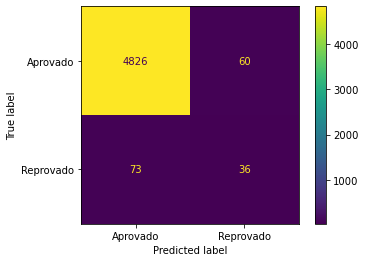

In [16]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Aprovado', 'Reprovado']);

In [15]:
y_predito = clf.predict(X_test)
accuracy_score(y_test, y_predito)

0.9733733733733734

**Observação:** Apresentou uma acuracia levemente menor (97%) que a base de treino (99%)

In [17]:
clf_pre_pruning = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_pre_pruning = clf_pre_pruning.fit(X_train,y_train)

/home/fabzd/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


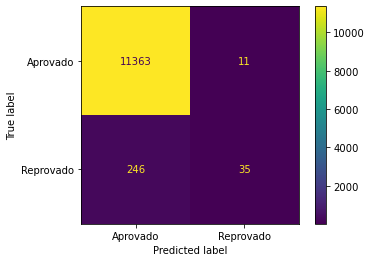

In [18]:
plot_confusion_matrix(clf_pre_pruning, X_train, y_train, display_labels=['Aprovado', 'Reprovado']);

In [19]:
y_predito = clf_pre_pruning.predict(X_train)
accuracy_score(y_train, y_predito)

0.977949377949378

In [20]:
y_predito = clf_pre_pruning.predict(X_test)
accuracy_score(y_test, y_predito)

0.977977977977978

**Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?**

Caso classificassemos todos os contratos como bons a acurácia da árvore seria 100%